# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [494]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [495]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [496]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Week2_Project assessment_Foundations of Data Science/foodhub_order.csv')

In [497]:
# Copying the data to variable df, to avoid any changes to the original data
df = data.copy()

In [498]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:



The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.




### **Question 1:** How many rows and columns are present in the data?

In [499]:
# check the number of rows and columns with ".shape"
df.shape

(1898, 9)

#### Observations:



*   The dataset has 1898 rows and 9 columns




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [500]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:



*   All columns have 1898 observations, which means that there are no missing values
*   order_id, customer_id, food_preparation_time and delivery_time are of data type int64.
*   cost_of_the_order is of data type float64.
*   restaurant_name, cuisine_type, day_of_the_week and rating are of data type object.
*   Based on the data dictionary rating should have been a numerical value. However, as observed in the first 5 rows of the dataset, some ratings are recorded as "Not given" which is why the data type is noted as "object".







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [501]:
# Checking for missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:



*   There are no missing values in this dataset




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [502]:
# Statistical summary of numerical data, transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [503]:
# Statistical summary of non-numerical data, transposed
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:



*   The minimum, average and maximum time it takes for food to be prepared once an order is place is 20 minutes, 27.37 minutes and 35 minutes, respectively
*   order_id and customer_id are simply identifiers.
*   cost_of_the_order ranges from 4.47 to 35.41, with an average of 16.49 and a median of 14.14
*   delivery_time ranges from 15 minutes to 33 minutes, with an average of 24.16 minutes, and a median of 25 minutes.
*   restaurant_name has 178 unique restaurants listed. The restaurant "Shake Shack" had the most number of orders in the data set, amounting to 219 orders.
*  There's 14 unique cuisines listed under cuisine_type. The most popular cuisine was American, and was ordered 584 times.
*   Orders were more popular on the weekend, with a frequency of 1351.






### **Question 5:** How many orders are not rated?

In [504]:
# Check for entries in column rating
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:




*   188 orders recieved a rating of 3
*   386 orders recieved a rating of 4
*   588 orders recieved a rating of 5
*   736 orders were not rated.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### *Order_id*

In [505]:
# check unique order_id
df.order_id.nunique()

1898

Observations:

There are 1898 unique order_id entries in this data set.

#### *Customer_id*

In [506]:
# check unique customer_id
df.customer_id.nunique()

1200

Observations:


Although there are 1898 unique order_id entries, there are only 1200 customer_id entries. This indicates that some customers have placed multiple orders through the app.

#### *Restaurant_name*

In [507]:
# check number of unique restaurants
df.restaurant_name.nunique()

178

Observations:

There are 178 unique restaurants listed in the data set.

#### *Cuisine_type*

In [508]:
# Check for number of unique cuisine_type
df.cuisine_type.nunique()

14

<ipython-input-509-71f69ab380c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'cuisine_type', palette = 'Paired', order = df['cuisine_type'].value_counts().index)


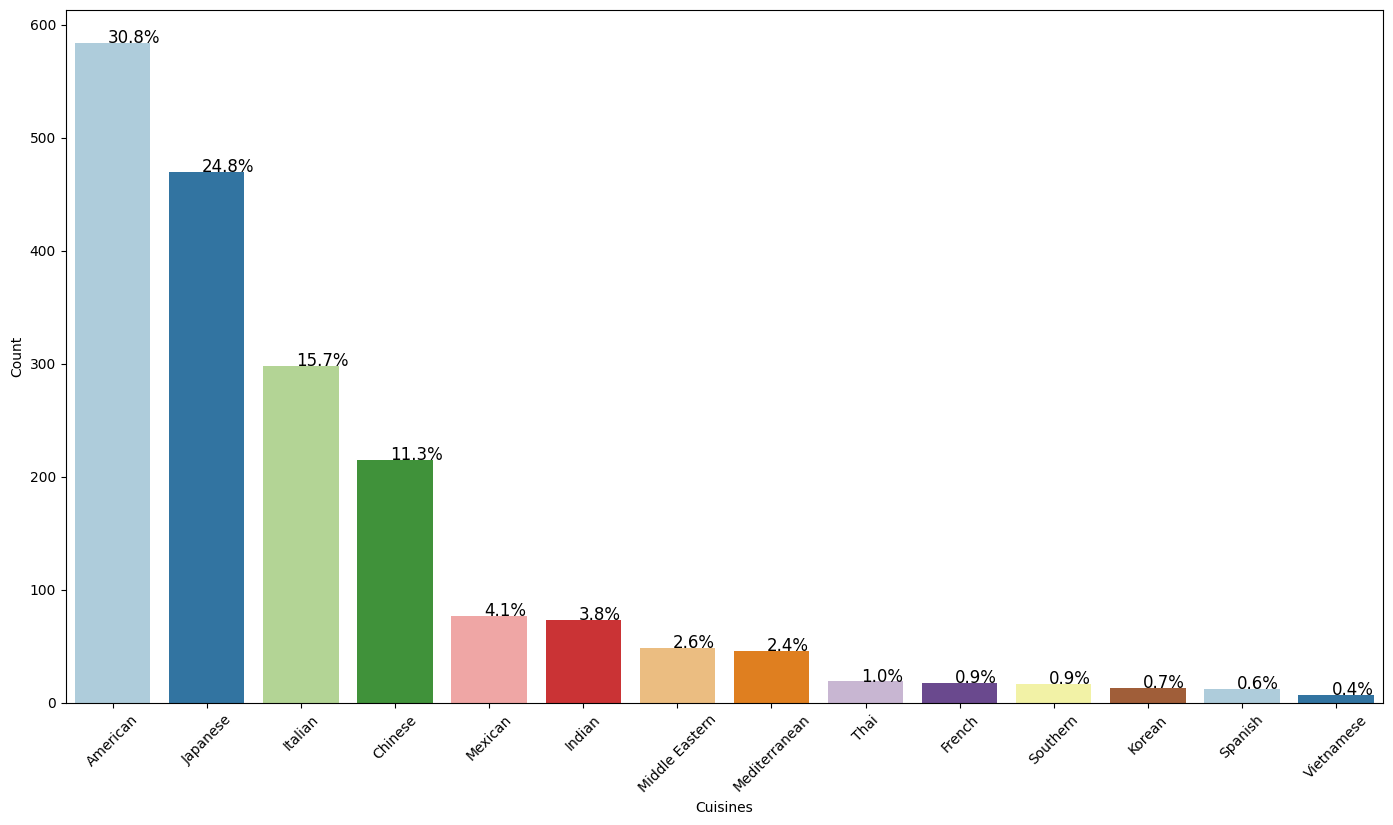

In [509]:
# plot histogram of the cuisine types and their frequency
plt.figure(figsize = (17, 9))
ax = sns.countplot(data = df, x = 'cuisine_type', palette = 'Paired', order = df['cuisine_type'].value_counts().index)
ax.tick_params(axis = 'x', rotation = 45)
ax.set(xlabel = 'Cuisines')
ax.set(ylabel = 'Count')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df['cuisine_type'])) # Percentage of each cuisine
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage
plt.show()

Observations:



*   There were 14 unique cuisines listed in the data set.
*   American cuisine was the most popular accounting for 30.8% of all orders; followed by japanese and italian cuisines, at 24.8% and 15.7%, respectively.



#### *Cost_of_the_order*

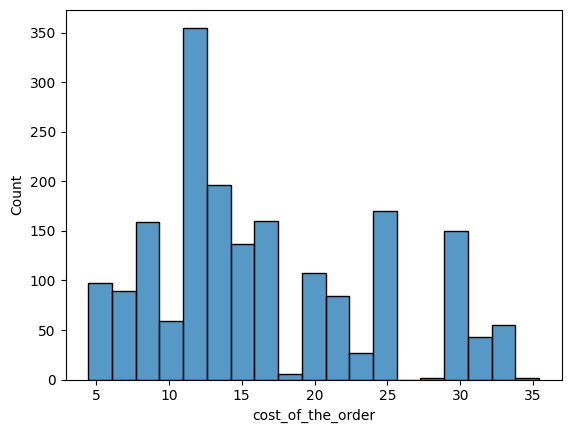

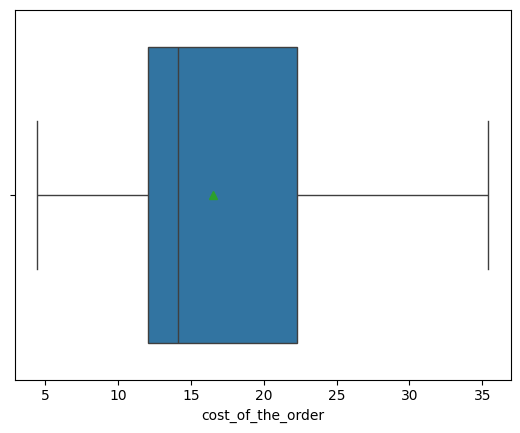

In [510]:
# create histogram to visualise cost data
plt.figure()
sns.histplot(data = df, x = 'cost_of_the_order')
plt.show()
# create boxplot to better visualise range and distribution of cost
sns.boxplot(data = df, x = 'cost_of_the_order', showmeans = True)
plt.show()

Observations:



*   The orders have varying costs as seen in the histogram. About 350 orders had a cost of approximately 11.50-12.
*   The data pertaining to cost is skewed to the right in the boxplot. The mean and median have a difference of approximately 2.



#### *day_of_the_week*

In [511]:
# Check for day_of_the_week variables
list(df.day_of_the_week.unique())

['Weekend', 'Weekday']

<ipython-input-512-3bfe9fa93468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data = df, x = 'day_of_the_week', palette = 'Paired', order = df['day_of_the_week'].value_counts().index)


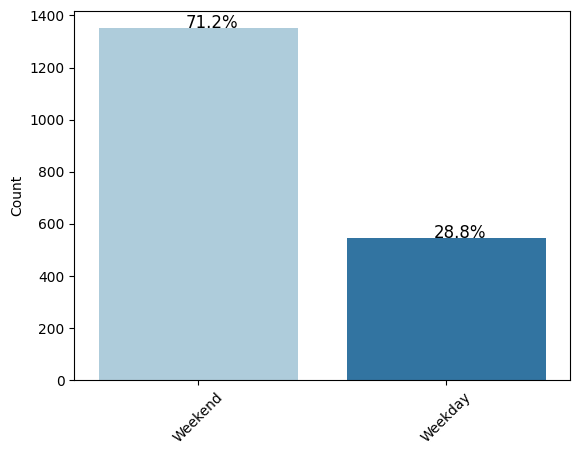

In [512]:
# plot histogram of the frequency of day_of_the_week variables
plt.figure()
ax1 = sns.countplot(data = df, x = 'day_of_the_week', palette = 'Paired', order = df['day_of_the_week'].value_counts().index)
ax1.tick_params(axis = 'x', rotation = 45)
ax1.set(xlabel = '')
ax1.set(ylabel = 'Count')
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df['day_of_the_week'])) # Percentage of each cuisine
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax1.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage
plt.show()

Observations:



*   There are only two variables in column days_of_the_week, namely Weekday and Weekend
*   71.2% of the orders were placed on weekend (Saturday and Sunday) while 28.8% orders were placed on weekdays.



#### *Rating*

In [513]:
# Check for unique variables
df.rating.nunique()

4

<ipython-input-514-bb95adae38d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data = df, x = 'rating', palette = 'Paired', order = df['rating'].value_counts().index)


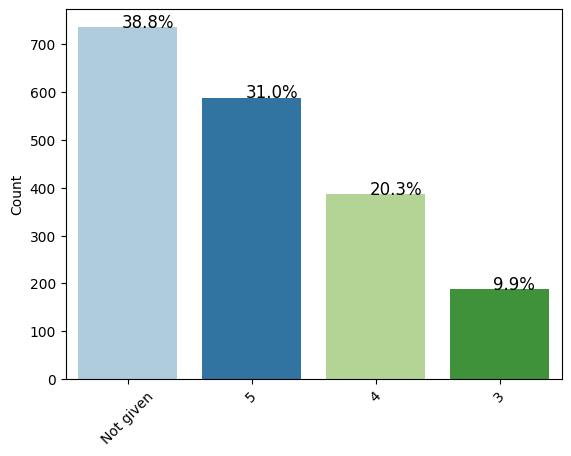

In [514]:
# plot histogram of the frequency of a certain rating
plt.figure()
ax2 = sns.countplot(data = df, x = 'rating', palette = 'Paired', order = df['rating'].value_counts().index)
ax2.tick_params(axis = 'x', rotation = 45)
ax2.set(xlabel = '')
ax2.set(ylabel = 'Count')
for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df['rating'])) # Percentage of each cuisine
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax2.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage
plt.show()

Observations:



*   38.8% of orders were not given a rating (marked by "Not given")
*   31% of the orders recieved a rating of 5
*   20.3% of the orders recieved a rating of 4
*   9.9% of the orders recieved a rating of 3





#### *Food_preparation_time*

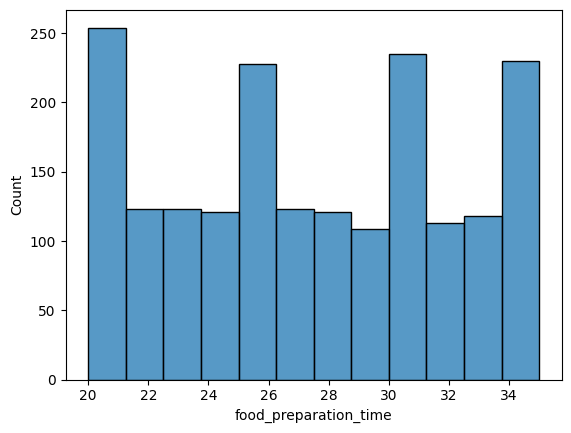

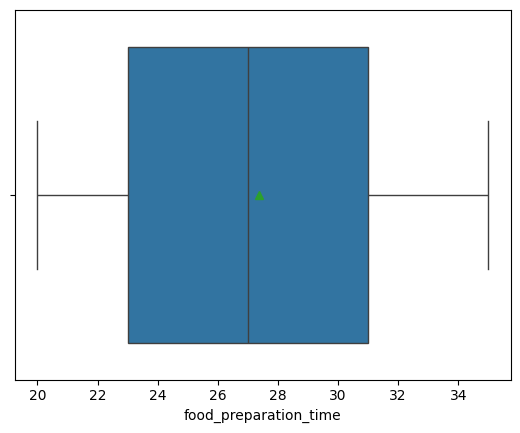

In [515]:
# create histogram to visualise food preparation time
plt.figure()
sns.histplot(data = df, x = 'food_preparation_time')
plt.show()
# create boxplot to better visualise range and distribution of food preparation time
sns.boxplot(data = df, x = 'food_preparation_time', showmeans = True)
plt.show()

Observations:



*   The difference mean and median for food_preparation_time is minimal.



#### *Deliver_time*

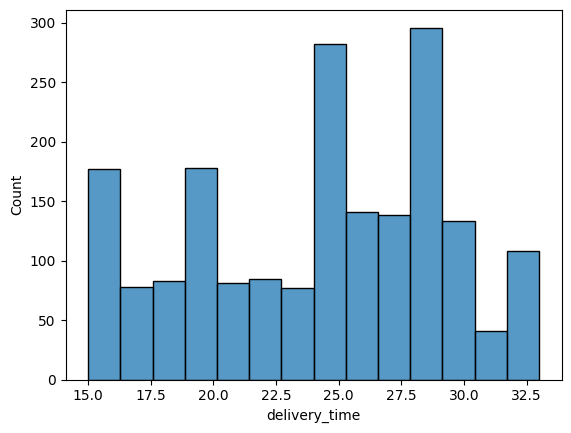

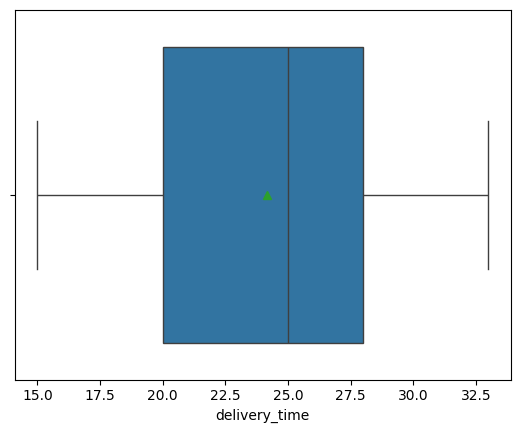

In [516]:
# create histogram to visualise delivery time
plt.figure()
sns.histplot(data = df, x = 'delivery_time')
plt.show()
# create boxplot to better visualise range and distribution of delivery time
sns.boxplot(data = df, x = 'delivery_time', showmeans = True)
plt.show()

Observations:



*   The difference between mean and median is minimal.
*   From the boxplot, the data is slightly skewed to the left.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [517]:
# to identify the top 5 restaurants in terms of number of orders
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index().head()

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:




*   The top 5 restaurants based on the number of orders are Shake Shack, The Meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm



### **Question 8**: Which is the most popular cuisine on weekends?

In [518]:
# create a subset of the data frame, only including rows that have day_of_the_week recorded as Weekend
df_cuisine_weekend = df[df.day_of_the_week == 'Weekend']
df_cuisine_weekend.cuisine_type.value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:



*   The most popular cuisines based on the weekend orders are: American, Japanese, Italian and Chinese



### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [519]:
# To return the percent of all orders which cost more than 20 dollars and round off decimal to two places
round(len(df[df.cost_of_the_order > 20]) / len(df) * 100, 2)

29.24

#### Observations:



*   29.24% of the orders in the data set cost more than 20.




### **Question 10**: What is the mean order delivery time?

In [520]:
# To calculate the mean of delivery times; round off decimal to 2 places
round(df.delivery_time.mean(), 2)

24.16

#### Observations:



*   The average delivery time is 24.16 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [521]:
# To identify the top three most frequent customers
df.customer_id.value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:



*   Customers 52832, 47440 and 83287 are the top 3 most frequent customers




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### *Important numerical data multivariate analysis*

<Axes: >

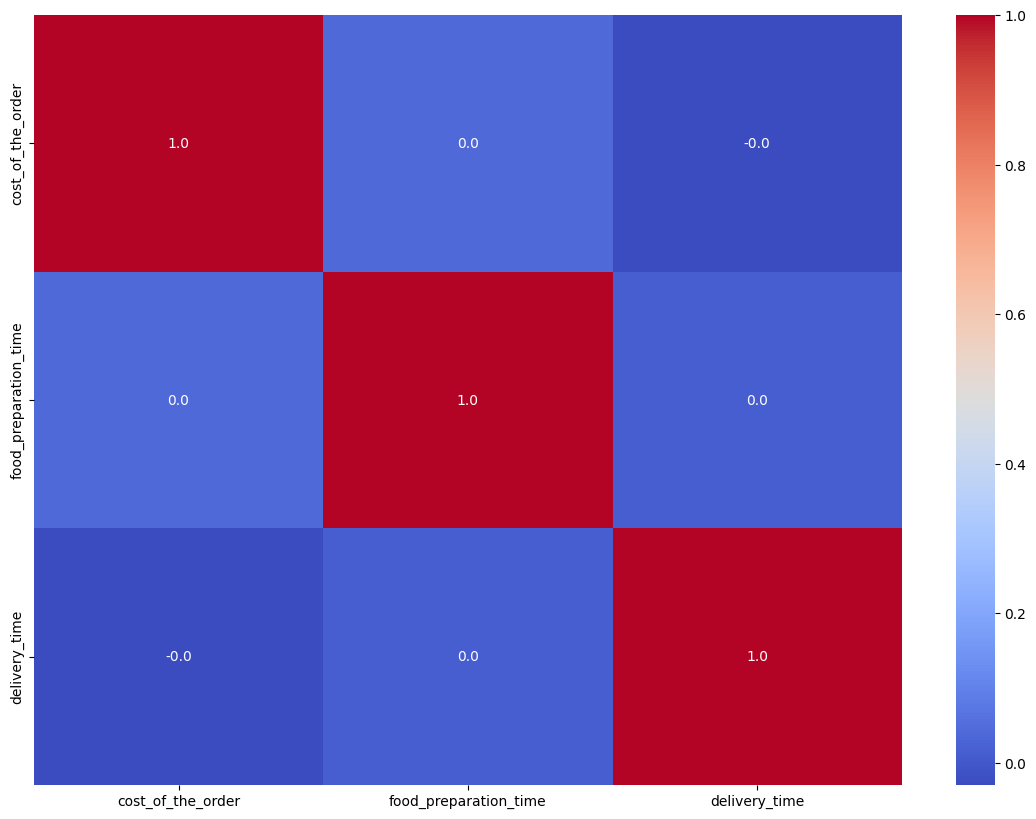

In [522]:
# Check for correlation among numerical variables apart from order_id and customer_id
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

Observation:



*   Correlation matrix revealed no significant correlations among any of the numerical variables.



#### *Cuisine against cost*

<ipython-input-523-f09a1dcc2fb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', palette = 'Paired', showmeans = True)


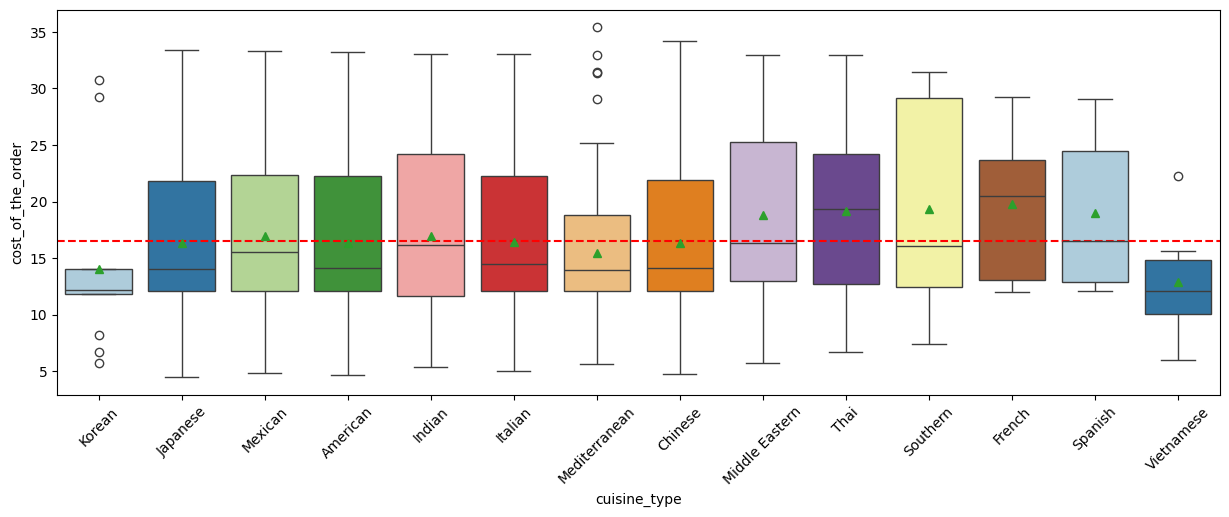

In [523]:
# Plot cuisine type against cost of the order
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', palette = 'Paired', showmeans = True)
plt.tick_params(axis = 'x', rotation = 45)  # rotate x axis ticks by 45 degrees
plt.axhline(df.cost_of_the_order.mean(), color = 'r', linestyle = '--') # Add line indicating mean of cost of order across data frame

Observations:



*   Most cuisines have a range of cost, however, some cuisines like vietnamese and korean on average costed less than the overall average cost of orders in the data set.



#### *Cuisine against food preparation time*

<ipython-input-524-ce0a7152f9ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', palette = 'Paired', showmeans = True)


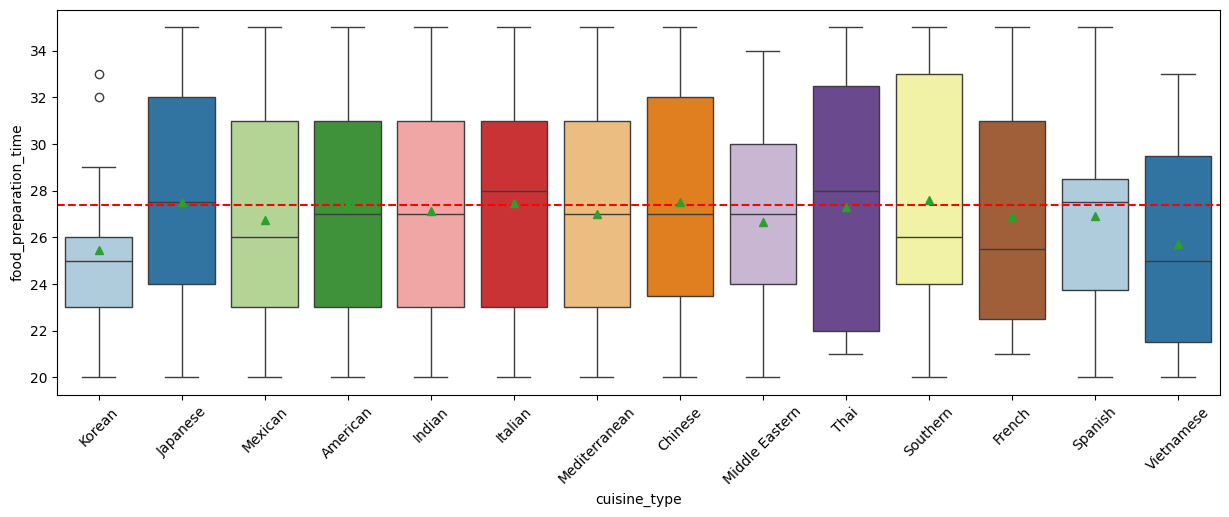

In [524]:
# Plot cuisine_type against food_preparation_time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', palette = 'Paired', showmeans = True)
plt.tick_params(axis = 'x', rotation = 45)  # rotate x axis ticks by 45 degrees
plt.axhline(df.food_preparation_time.mean(), color = 'r', linestyle = '--') # Add line indicating mean of food preparation time across data frame

Observations:



*   Majority of the Korean cuisine orders require below average amount of time for food preparation in comparison to other cuisines across the data frame



#### *Cuisine against delivery time*

<ipython-input-525-4d46f22b1442>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'cuisine_type', y = 'delivery_time', palette = 'Paired', showmeans = True)


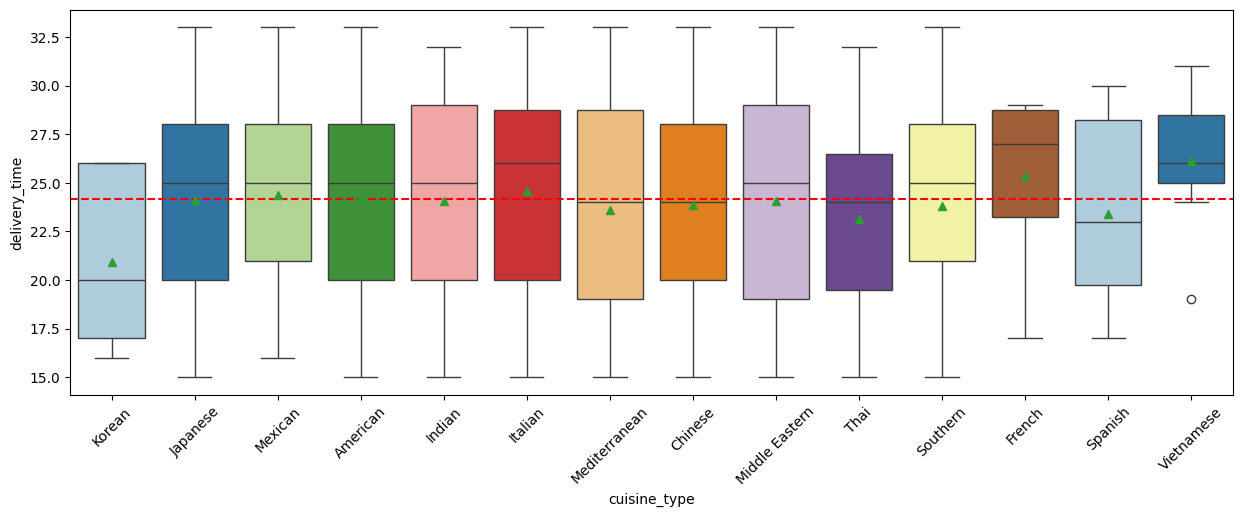

In [525]:
# Plot cuisine type against delivery time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'cuisine_type', y = 'delivery_time', palette = 'Paired', showmeans = True)
plt.tick_params(axis = 'x', rotation = 45)  # rotate x axis ticks by 45 degrees
plt.axhline(df.delivery_time.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of delivery time across data frame

Observations:



*   Korean cuisine has a mean and median delivery time below the average delivery time of the data frame, meaning it seems to get delivered a fair bit quicker than the other cuisines.



#### *Day of the week against cost*

<ipython-input-526-3d5b59f2cd14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order', palette = 'Paired', showmeans = True)


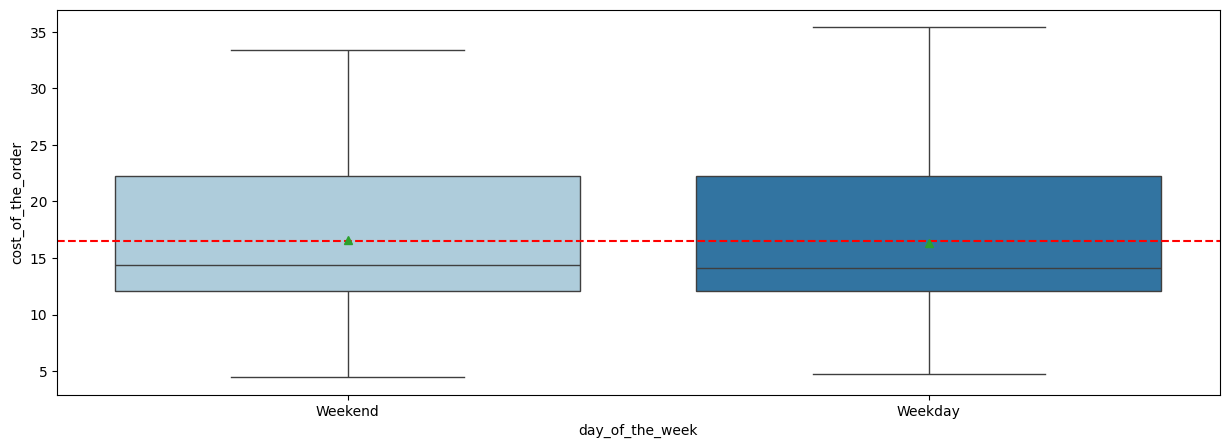

In [526]:
# Plot day of the week against cost
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order', palette = 'Paired', showmeans = True)
plt.axhline(df.cost_of_the_order.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of cost across data frame

Observations:



*   No particular difference is observed in terms of cost when comparing weekday and weekend orders.



#### *Day of the week against food preparation time*

<ipython-input-527-9420557ab0c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time', palette = 'Paired', showmeans = True)


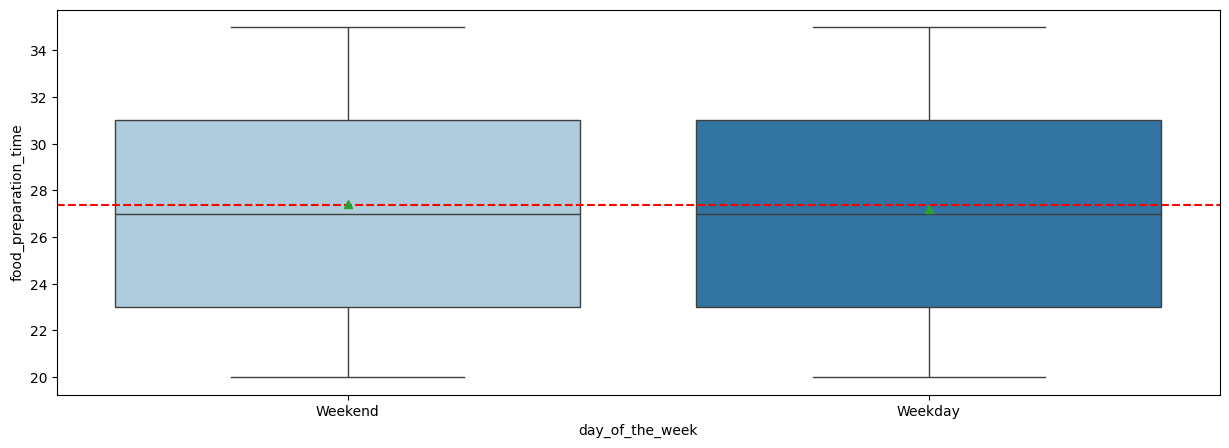

In [527]:
# Plot day of the week against food preparation time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time', palette = 'Paired', showmeans = True)
plt.axhline(df.food_preparation_time.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of food preparation time across data frame

Observations:



*   No particular difference is observed in terms of food preparation time when comparing weekday and weekend orders.

#### *Day of the week against delivery time*

<ipython-input-528-e133c6d476b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', palette = 'Paired', showmeans = True)


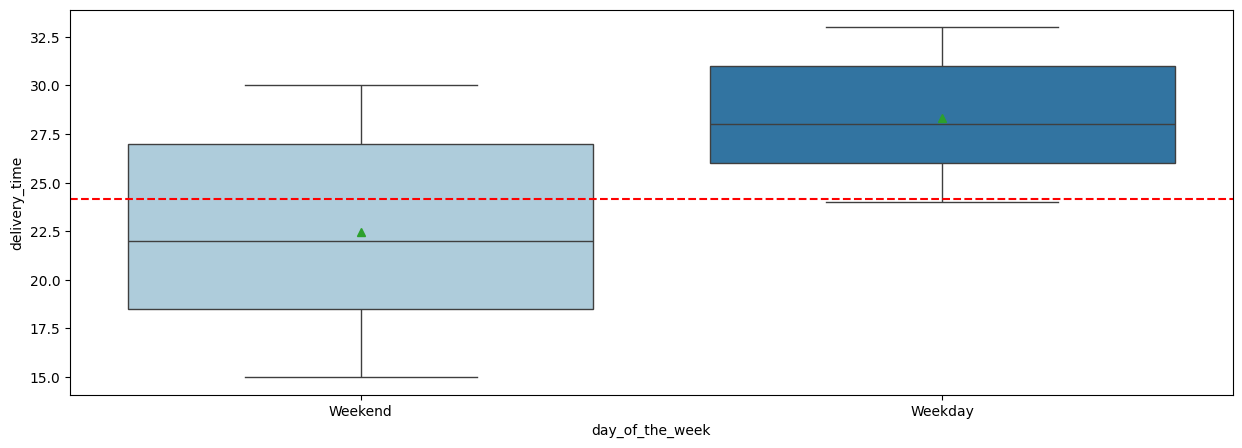

In [528]:
# Plot day of the week against delivery time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', palette = 'Paired', showmeans = True)
plt.axhline(df.delivery_time.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of delivery time across data frame

Observations:



*   Weekday orders take more than average time for delivery across the dataset

#### *Rating against cost, food preparation time and delivery time*

<ipython-input-529-f4854854a501>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order', palette = 'Paired', showmeans = True)


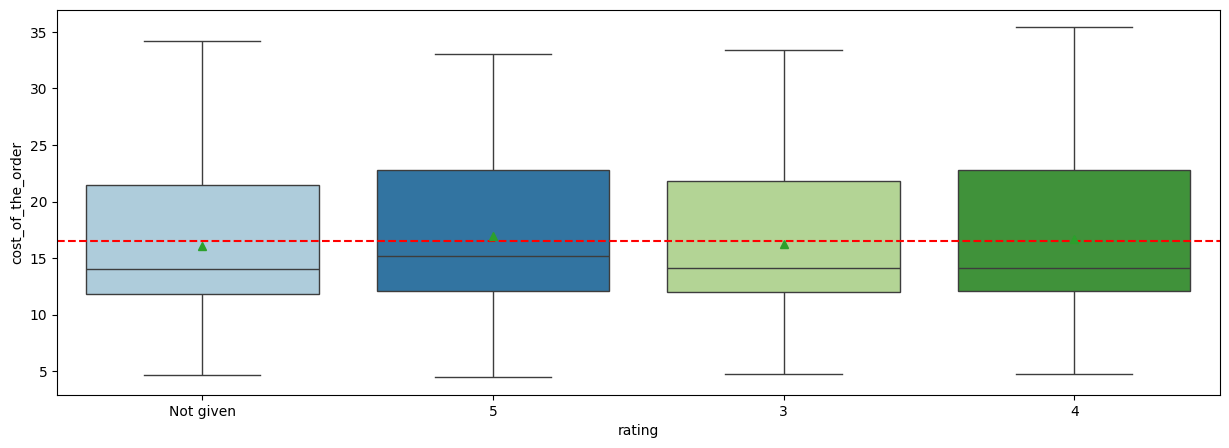

In [529]:
# Plot order rating against cost of the order
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order', palette = 'Paired', showmeans = True)
plt.axhline(df.cost_of_the_order.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of cost across data frame

<ipython-input-530-c68569a725ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'rating', y = 'food_preparation_time', palette = 'Paired', showmeans = True)


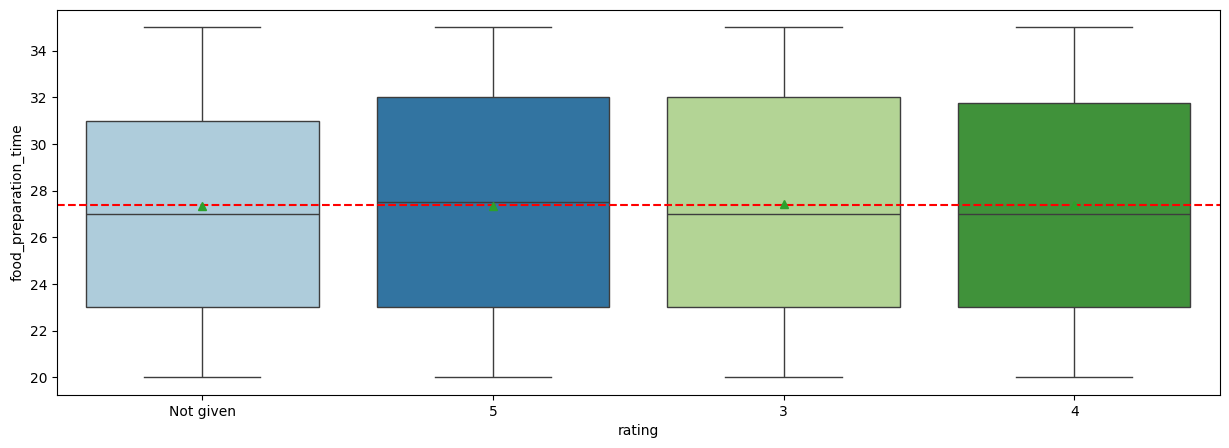

In [530]:
# Plot order rating against food_preparation_time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'rating', y = 'food_preparation_time', palette = 'Paired', showmeans = True)
plt.axhline(df.food_preparation_time.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of food_preparation_time across data frame

<ipython-input-531-f35d9b2210c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'rating', y = 'delivery_time', palette = 'Paired', showmeans = True)


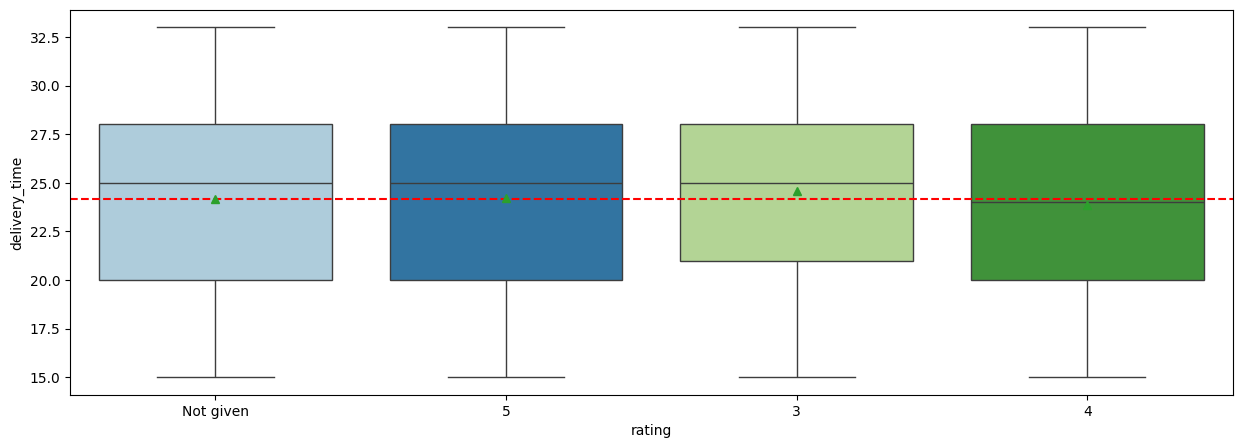

In [531]:
# Plot order rating against delivery_time
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = 'rating', y = 'delivery_time', palette = 'Paired', showmeans = True)
plt.axhline(df.delivery_time.mean(), color = 'r', linestyle = '--')  # Add line indicating mean of delivery_time across data frame

Observation:



*   No particular trend was observed in terms of rating against cost, food preparation time or delivery time.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [532]:
# Copy data to new data frame
df2 = df.copy()
df2.rating.replace("Not given", 0, inplace = True) # Ratings marked as Not given are replaced with 0)

In [533]:
# summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [534]:
# converting rating from object to int64
df2.rating = pd.to_numeric(df2.rating)

In [535]:
# rechecking summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


In [536]:
#replacing 0 ratings with Nan
df2.rating.replace(0, np.nan, inplace = True)

<ipython-input-537-4698fd268fc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df2, x = 'rating', palette = 'Paired')


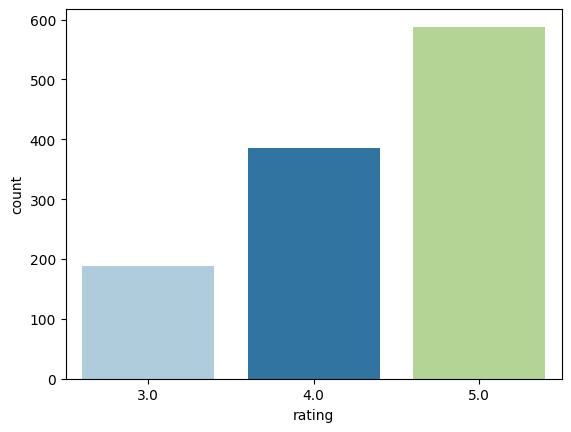

In [537]:
# Plot rating count for those orders that were rated
sns.countplot(data = df2, x = 'rating', palette = 'Paired')
plt.show()

In [538]:
# Create subset listing restaurants of rating 4 and above
df3 = df2.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index()
print(df3[df3.rating >= 4])

                   restaurant_name  rating
0                       'wichcraft     5.0
1             Ravagh Persian Grill     5.0
2    Chola Eclectic Indian Cuisine     5.0
3                      Chote Nawab     5.0
4                           Junoon     5.0
..                             ...     ...
134                   Pongsri Thai     4.0
135               Frank Restaurant     4.0
136               Dirty Bird to Go     4.0
137                      Rye House     4.0
138                  DuMont Burger     4.0

[139 rows x 2 columns]


In [539]:
# returns the top-five restaurants by total number of orders with ratings
df2.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index().head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


**Shake Shack, The meatball shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken have recieved more than 50 order ratings.**

In [540]:
# Calculate the mean rating for the above mentioned restaurants that have recieved more than 50 ratings
print("The average rating recieved by Shake Shack is", round(df3[df3['restaurant_name'] == 'Shake Shack'].rating.mean(), 2))
print("The average rating recieved by The Meatball Shop is", round(df3[df3['restaurant_name'] == 'The Meatball Shop'].rating.mean(), 2))
print("The average rating recieved by Blue Ribbon Sushi is", round(df3[df3['restaurant_name'] == 'Blue Ribbon Sushi'].rating.mean(), 2))
print("The average rating recieved by Blue Ribbon Fried Chicken is", round(df3[df3['restaurant_name'] == 'Blue Ribbon Fried Chicken'].rating.mean(), 2))

The average rating recieved by Shake Shack is 4.28
The average rating recieved by The Meatball Shop is 4.51
The average rating recieved by Blue Ribbon Sushi is 4.22
The average rating recieved by Blue Ribbon Fried Chicken is 4.33


#### Observations:

There are 4 restaurants fulfilling the criteria for the promotional offer. They are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Friend Chicken. They each had more than 50 ratings averaging greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [541]:
# create function to determine revenue
def rev_gen(x):
    if x > 20:
      return x * 0.25
    elif x > 5:
      return x * 0.15
    else:
      return x * 0
# Create a new column in the data frame to record revenue generated from each order
df['revenue_generated'] = df.cost_of_the_order.apply(rev_gen)

In [542]:
# Check if new column has been created and the calculations applied
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue_generated
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [543]:
# calculate total revenue, and round off to two decimal places
print("The net revenue generated by the company across all orders is", round(df.revenue_generated.sum(), 2), "dollars")

The net revenue generated by the company across all orders is 6166.3 dollars


#### Observations:

The net revenue generated by the company across all orders 6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [544]:
# Create column for total time required for delivery
df['total_delivery_time'] = df['food_preparation_time'] + df ['delivery_time']
df.head() # to check that new column has been created with appropriate calculations

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue_generated,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [545]:
# Calculate percentage of orders that require more than 60 minutes, and print statement
print("The percentage of orders that require more than 60 minutes is", round(len(df[df.total_delivery_time > 60]) / len(df) * 100, 2))

The percentage of orders that require more than 60 minutes is 10.54


#### Observations:

The percentage of orders that require more than 60 minutes is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [546]:
# Calculate mean delivery time on weekdays and weekends
print('The mean delivery time on weekdays is', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()), 'minutes')
print('The mean delivery time on weekends is', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()), 'minutes')

The mean delivery time on weekdays is 28 minutes
The mean delivery time on weekends is 22 minutes


#### Observations:

The mean delivery time on weekdays is 28 minutes, while on weekends its is 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:


We analysed a set of data of 1898 different online orders made by registered customers through the FoodHub app. The data contained information relating to cost of orders, time required for food preparation, delivery time and various cuisine types, among other information.

Through our analyses we have been able to conclude that:



1.   Majority of orders were placed on weekend (71.2%)
2.   American cuisine is most popular, accounting for approximately 31% of all orders. It is followed by Japanese and Italian cuisines at approximately 25% and 16%, respectively.
3.   Korean and vietnamese cuisines had a lower average cost than other cuisines across the data set. Korean cuisine had an average and median time, of food preparation and delivery time quicker than other cuisines. Vietnamese cuisine displayed longer delivery times than the average across the data set.
4.   It takes longer to deliver food on weekdays with an average time of 28 minutes, in contrast to 22 minutes on the weekends.
5.   Shake Shack, The meatball shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken have recieved more than 50 order ratings.






### Recommendations:



1.   Since 71% of the orders are placed on weekends and delivery time is 22 minutes on average, FoodHub could apply a small surcharge to these orders to improve profits.
2.   Since American cuisines seems to be the most popular of the cuisines, it may help to have more restaurants serving this cuisine onto the apps restaurant listing.
3.   Some cuisines like the french cuisine, has a higher median and average cost compared to the overall data set, but account for only 0.9% of the sales. Since FoodHub can have higher earnings from more costly orders, it may be profitable to introduce some offers to encourage customers to buy more at these restaurants.
4.   Further information is required to understand why delivery times are longer on weekdays. More data pertaining to delivery persons availability and traffic conditions may help us identify ways to improve these delivery times.
5.   Further data is required to understand why some orders are delivered faster than others as this could potentially help in optimising delivery times for those orders that take longer. This improvement might be reflected by the customer in the form of improved ratings.
6.   FoodHub could also introduce a reward system, which rewards customers a few points with every order allowing for accumulation of points to perform a free in-app purchase with earned points. This could encourage customers to order more through the app.



---